### **Problem Statement**

Each week the Consumer Financial Protection Bureau sends thousands of consumers' complaints about financial products and services to companies for a response. Classify those consumer complaints into the product category it belongs to using the description of the complaint.

### **Solution**

The goal of the project is to classify the complaint into a specific product category. Since it has multiple categories, it becomes a multiclass classification that can be solved through many of the machine learning algorithms. Once the algorithm is in place, whenever there is a new complaint, we can easily categorize it and can then be redirected to the concerned person. This will save a lot of time because we are minimizing the human intervention to decide whom this complaint should go to.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [9]:
data=pd.read_csv('consumer_complaints.csv',low_memory=False)
data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [10]:
data.shape

(555957, 18)

In [11]:
data=data[['product','consumer_complaint_narrative']]
data=data[pd.notnull(data['consumer_complaint_narrative'])]

In [12]:
data.isnull().sum()

product                         0
consumer_complaint_narrative    0
dtype: int64

In [13]:
data.sample(10)

,product,consumer_complaint_narrative
268205,Mortgage,XXXX XXXX XXXX XXXX I am a long time customer ...
287864,Mortgage,"I have been harassed, threatened and charged f..."
263074,Credit reporting,We request that the XXXX reporting agencies bl...
279149,Debt collection,I signed up with XXXX XXXX XXXX to handle my e...
293078,Credit reporting,I have all these hard credit inquiries on my c...
496387,Mortgage,My husband and I have been trying to get a loa...
237370,Debt collection,"I received a letter from a Collection agency, ..."
503041,Mortgage,I have XXXX loan modification agreements with ...
263532,Debt collection,I paid a debt i was unaware of to the XXXX of ...
224597,Mortgage,I had a home equity line of credit. The line w...


In [14]:
data['category_id']=data['product'].factorize()[0]
data.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [15]:
# check distribution of complaints by category
data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

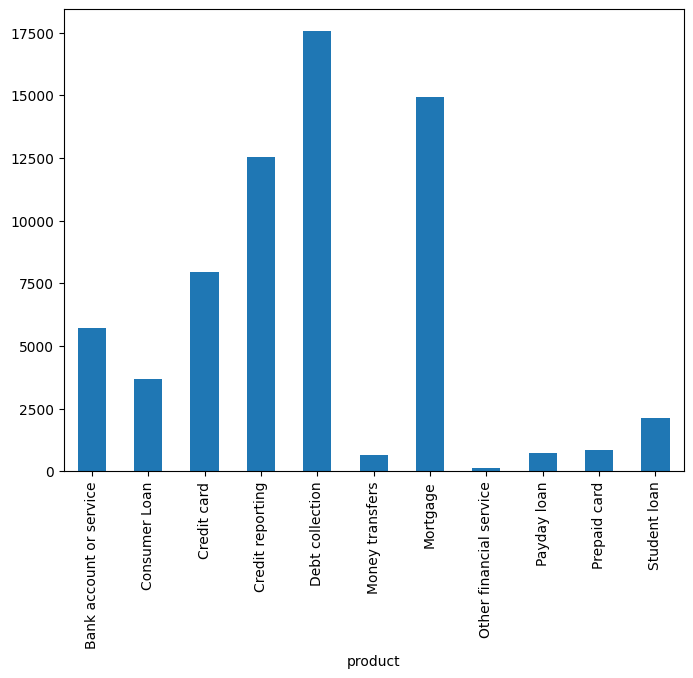

In [16]:
# lets plot it and see
fig=plt.figure(figsize=(8,6))
data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

### **Splitting the data**

In [17]:
train_x, valid_x, train_y, valid_y=train_test_split(data['consumer_complaint_narrative'],data['product'])

In [18]:
encoder=LabelEncoder()
train_y=encoder.fit_transform(train_y)
valid_y=encoder.fit_transform(valid_y)

### **Feature Extraction**
tfidf_vect=TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(data['consumer_complaint_narrative'])

xtrain_tfidf=tfidf_vect.transform(train_x)
xvalid_tfidf=tfidf_vect.transform(valid_x)

In [19]:
train_y

array([3, 4, 6, ..., 6, 1, 6])

In [20]:
valid_y

array([0, 4, 3, ..., 1, 4, 4])

In [21]:
xtrain_tfidf

<50104x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4528701 stored elements in Compressed Sparse Row format>

In [22]:
model=LogisticRegression(C=1.0,class_weight=None,dual=False,
                         fit_intercept=True,intercept_scaling=1,
                         max_iter=100,multi_class='ovr',
                         n_jobs=1,penalty='l2',random_state=None,
                         solver='liblinear',tol=0.0001,verbose=0,
                         warm_start=False)

model.fit(xtrain_tfidf,train_y)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [23]:
model

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [24]:
accuracy_score=accuracy_score(model.predict(xvalid_tfidf),valid_y)
print('Accuracy:',accuracy_score)

Accuracy: 0.8449287510477788


In [25]:
print(classification_report(valid_y,model.predict(xvalid_tfidf),
                            target_names=data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.81      0.81      1435
          Consumer Loan       0.79      0.58      0.67       924
               Mortgage       0.79      0.80      0.80      1929
            Credit card       0.86      0.86      0.86      3120
       Credit reporting       0.82      0.90      0.86      4351
           Student loan       0.77      0.51      0.62       179
Bank account or service       0.92      0.95      0.93      3792
            Payday loan       0.00      0.00      0.00        26
        Money transfers       0.70      0.20      0.31       187
Other financial service       0.84      0.53      0.65       230
           Prepaid card       0.88      0.78      0.83       529

               accuracy                           0.84     16702
              macro avg       0.74      0.63      0.67     16702
           weighted avg       0.84      0.84      0.84     16702



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
conf_mat=confusion_matrix(valid_y,model.predict(xvalid_tfidf))
conf_mat

array([[1156,    9,  111,   31,   44,   10,   51,    0,    0,   21,    2],
       [  19,  532,   72,   62,  145,    2,   79,    0,    6,    0,    7],
       [  66,    7, 1552,  110,  170,    5,   17,    0,    0,    2,    0],
       [   8,   31,   75, 2674,  268,    0,   57,    0,    2,    0,    5],
       [  27,   43,   71,  159, 3923,    1,   81,    0,    8,    0,   38],
       [  48,    3,   10,    6,   16,   92,    4,    0,    0,    0,    0],
       [  35,   13,   18,   46,   68,    0, 3612,    0,    0,    0,    0],
       [   8,    1,    0,    2,    8,    5,    1,    0,    0,    0,    1],
       [  16,   25,    5,    6,   82,    0,   14,    0,   37,    0,    2],
       [  39,    1,   52,    3,    8,    4,    2,    0,    0,  121,    0],
       [   7,    6,    6,   10,   62,    0,   25,    0,    0,    0,  413]],
      dtype=int64)

In [27]:
category_id_df=data[['product','category_id']].drop_duplicates().sort_values('category_id')
category_to_id=dict(category_id_df.values)
id_to_category=dict(category_id_df[['category_id','product']].values)

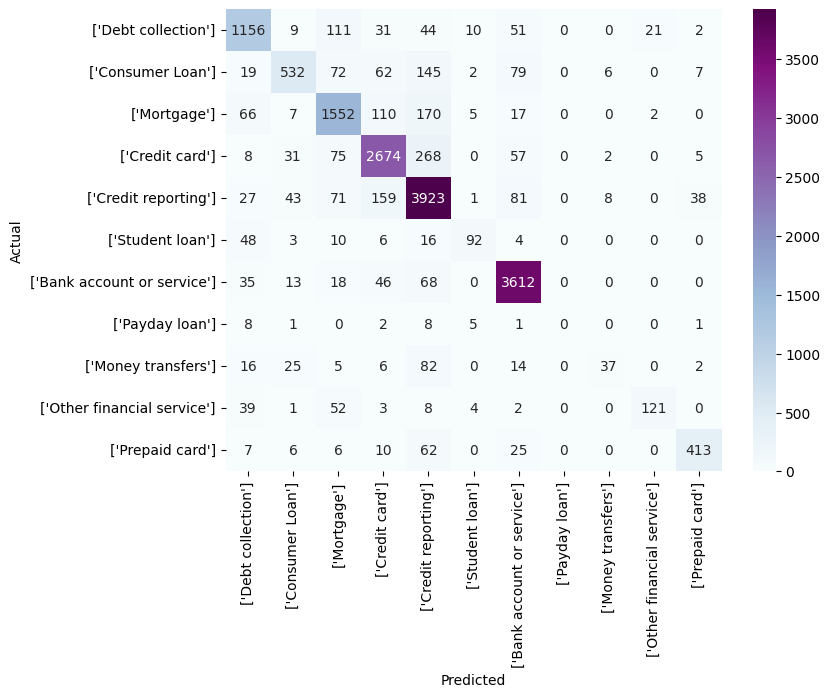

In [29]:
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='BuPu',
            xticklabels=category_id_df[['product']].values,
            yticklabels=category_id_df[['product']].values) 

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Prediction Example**

In [30]:
texts = ["This company refuses to provide me verification and validation of debt "
         "per my right under the FDCPA. I don't believe this debt is mine."]

text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)

print(texts)
print(f" - Predicted as: {id_to_category[predictions[0]]}")  # Fixed f-string formatting

["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I don't believe this debt is mine."]
 - Predicted as: Credit reporting
